In [2]:
import deeplake

ds = deeplake.load('hub://activeloop/fer2013-train')

C:\Users\Divya Sharma\AppData\Roaming\Python\Python310\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.2.14) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-train



\

hub://activeloop/fer2013-train loaded successfully.



In [3]:
ds.tensors

{'images': Tensor(key='images'), 'labels': Tensor(key='labels')}

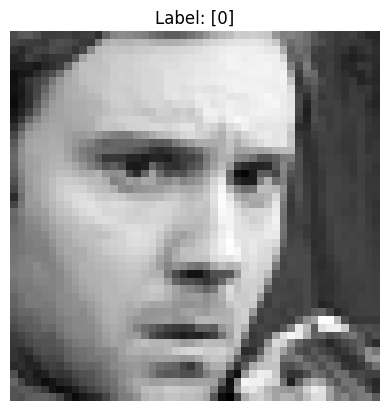

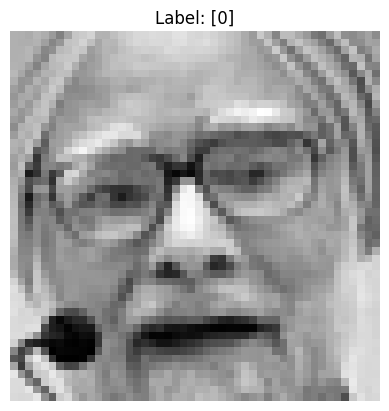

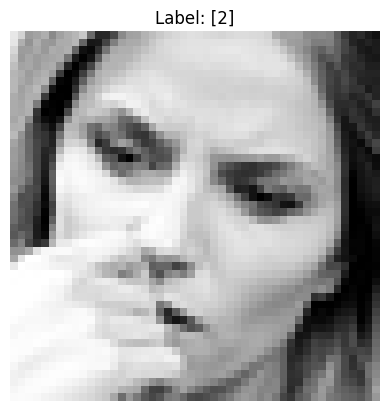

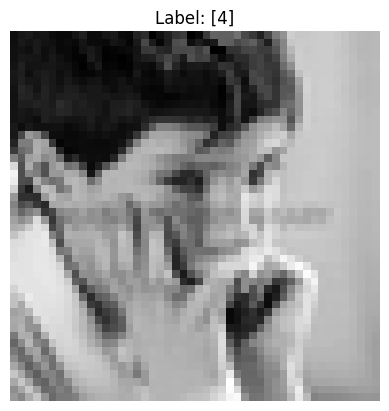

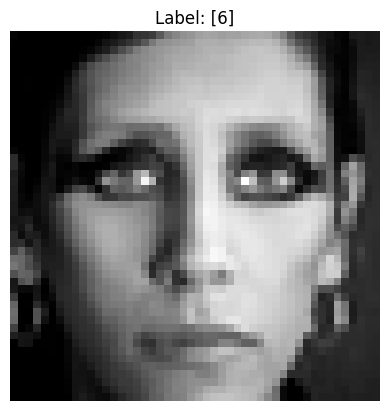

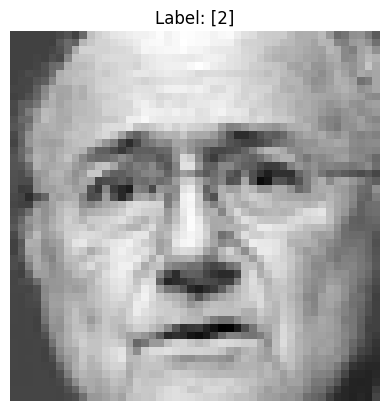

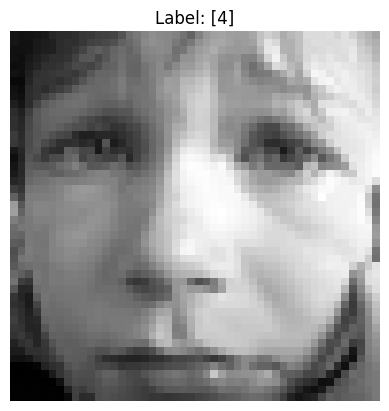

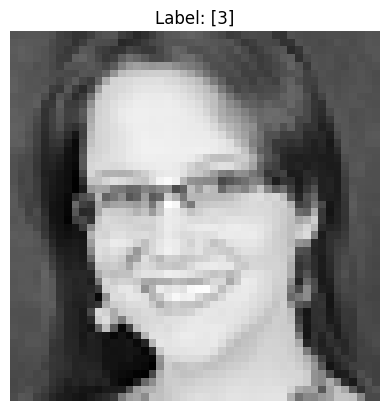

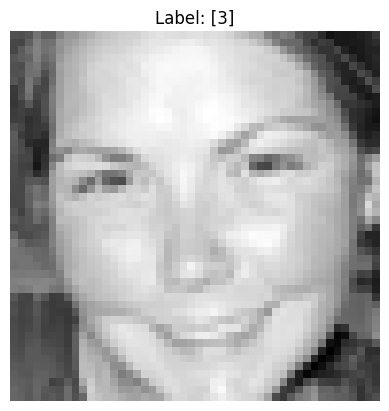

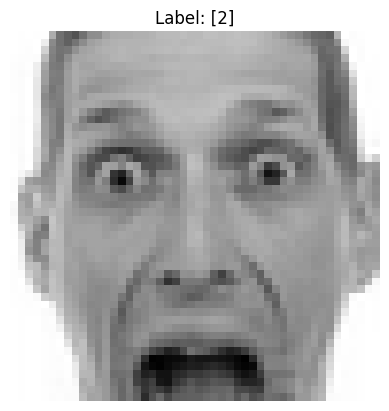

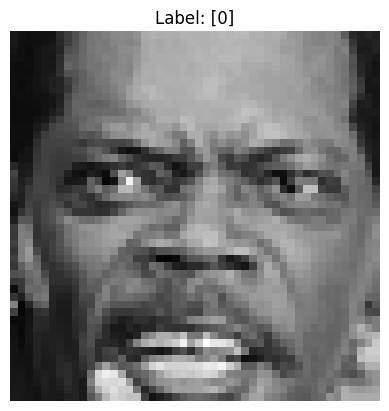

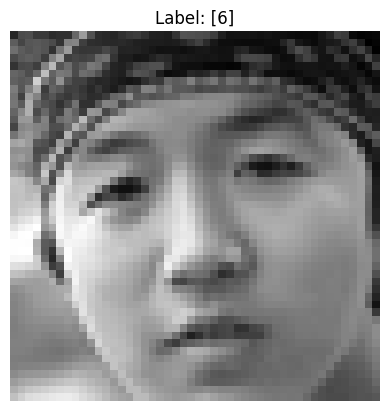

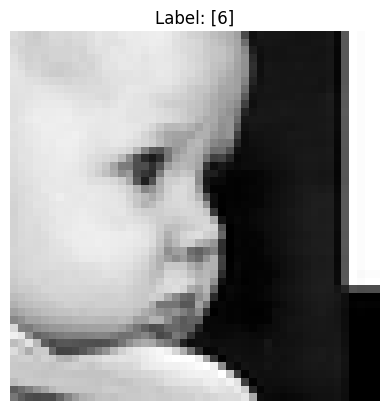

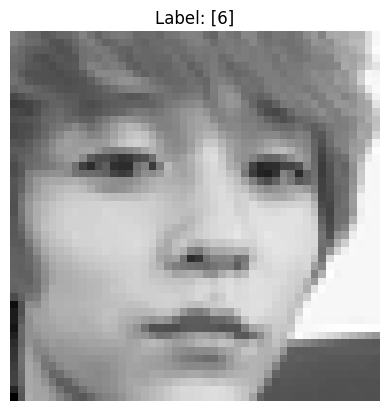

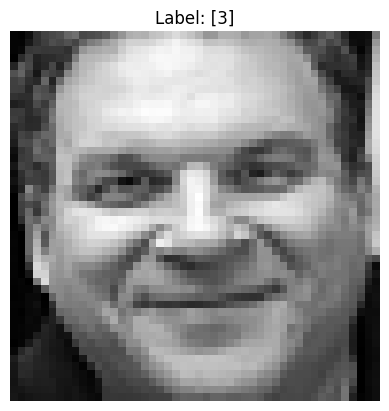

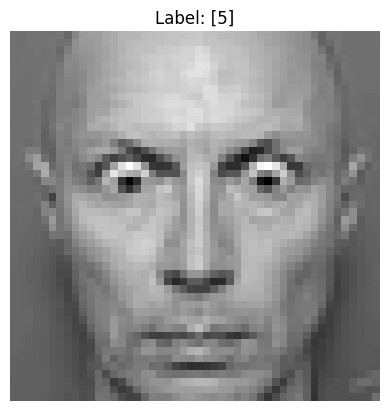

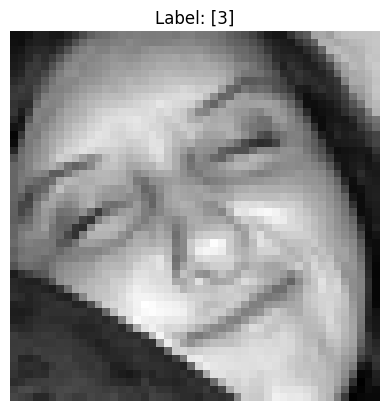

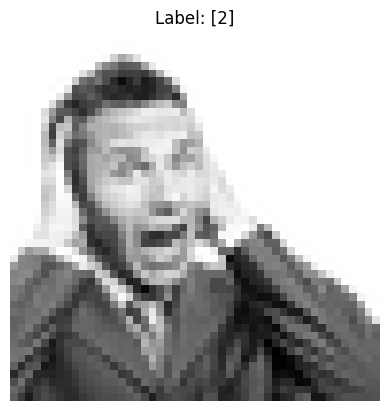

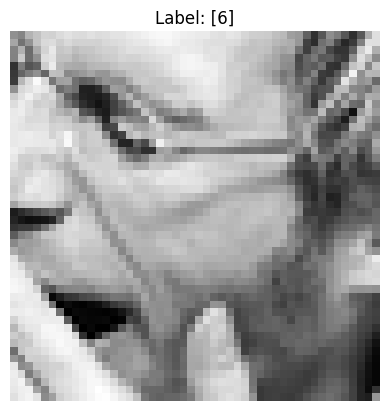

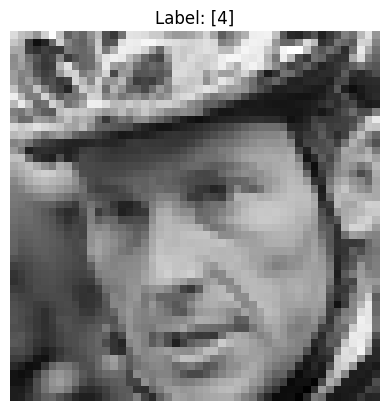

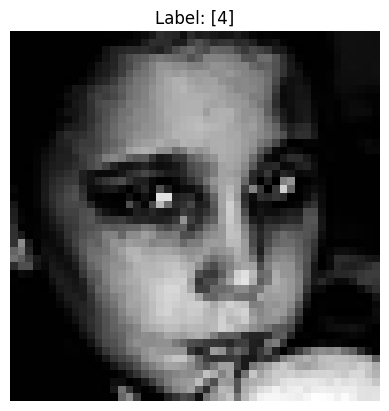

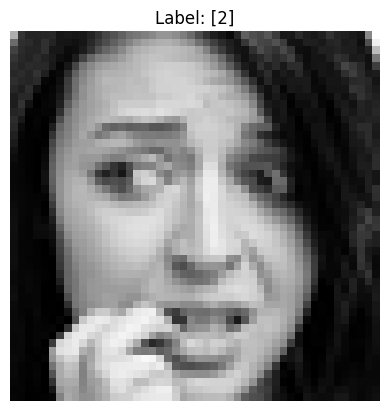

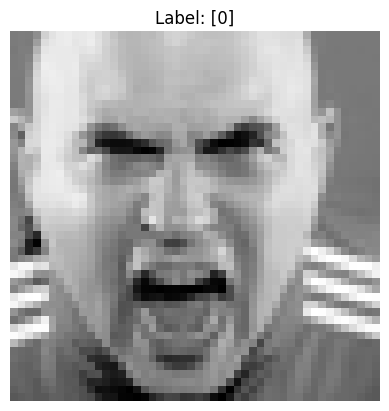

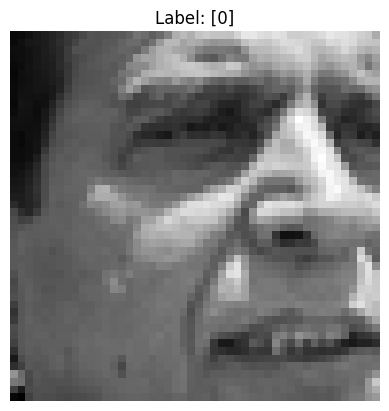

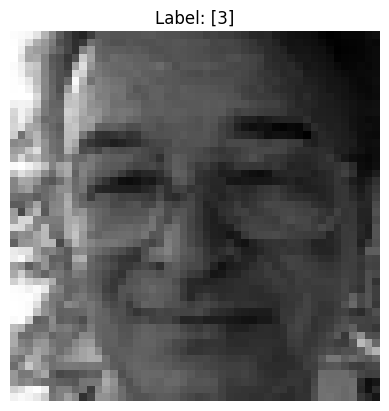

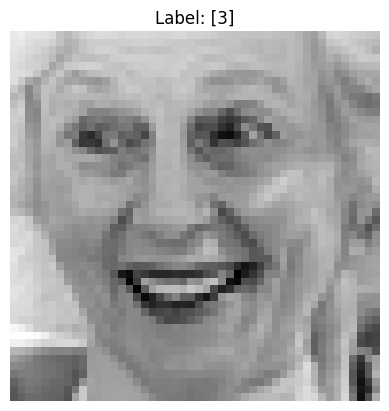

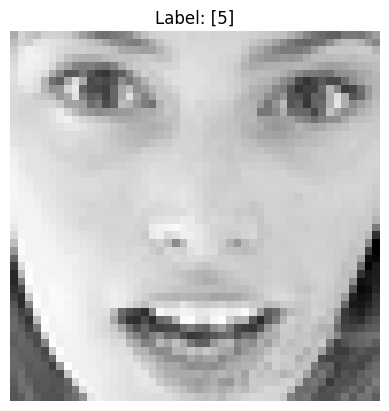

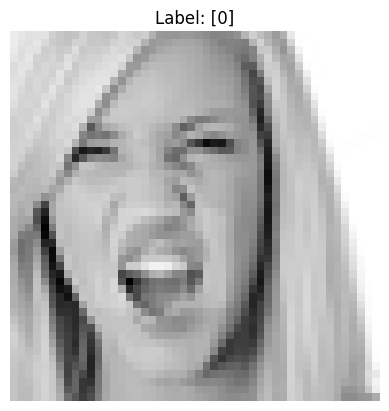

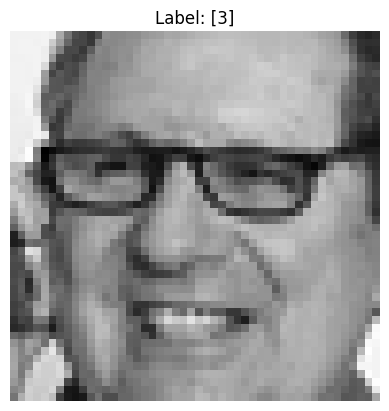

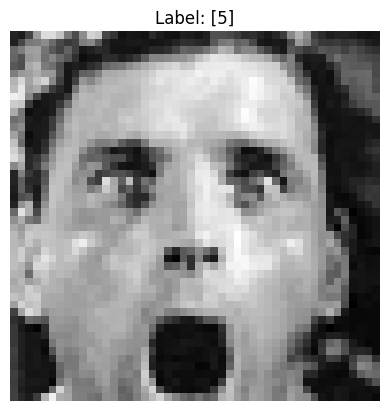

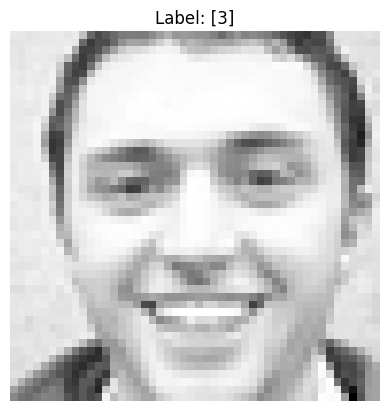

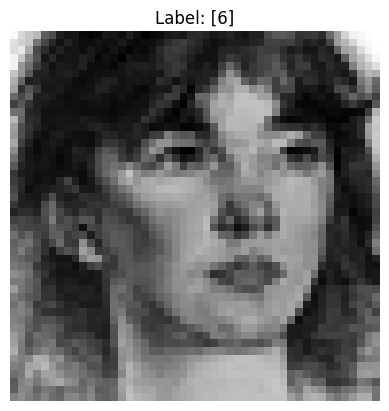

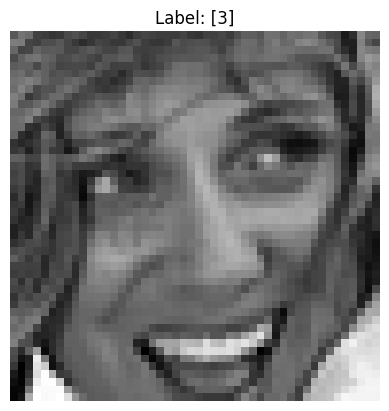

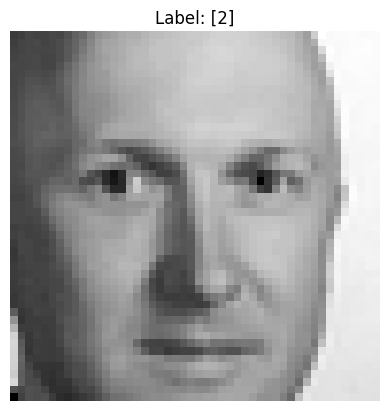

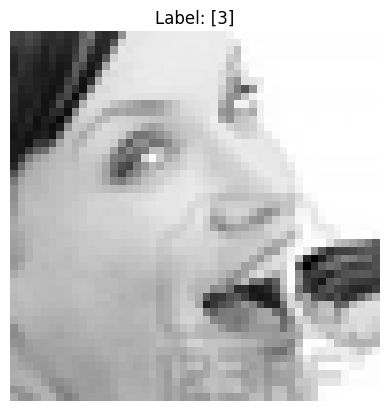

In [4]:
import matplotlib.pyplot as plt
for i in range(35):
    img = ds[i]['images'].numpy()
    label = ds[i]['labels'].numpy()

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

In [5]:
def normalize_image(ds, i):

    img = ds[i]['images'].numpy().astype('float32') / 255.0
    label = ds[i]['labels'].numpy()
    return img, label

normalize_image(ds,0)[0]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.20392157, 0.16862746,
        0.16078432],
       [0.25490198, 0.23921569, 0.22745098, ..., 0.21960784, 0.20392157,
        0.17254902],
       [0.19607843, 0.16862746, 0.21176471, ..., 0.19215687, 0.21960784,
        0.18431373],
       ...,
       [0.35686275, 0.25490198, 0.16470589, ..., 0.28235295, 0.21960784,
        0.16862746],
       [0.3019608 , 0.32156864, 0.30980393, ..., 0.4117647 , 0.27450982,
        0.18039216],
       [0.3019608 , 0.28235295, 0.32941177, ..., 0.41568628, 0.42745098,
        0.32156864]], dtype=float32)

In [6]:
import tensorflow as tf
import os
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import matplotlib.pyplot as plt

emotion_labels = { 0: 'Angry' ,
                   1: 'Disgust' ,
                   2: 'Fear' ,
                   3: 'Happy' ,
                   4: 'Sad' ,
                   5: 'Surprise' ,
                   6: 'Neutral' }

images=[]
labels=[]

for i in range(len(ds)): 
    img = ds[i]['images'].numpy().astype('float32')/255.0
    img = img.reshape(48,48,1)
    label = ds[i]['labels'].numpy()
    images.append(img)
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

X_temp, X_test, y_temp, y_test = train_test_split(images, labels, test_size=0.1, stratify=labels, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

data_aug_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization , GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    data_aug_gen.flow(train_images, train_labels, batch_size=64),
    validation_data=(val_images, val_labels),
    epochs=30
)


test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


C:\Users\Divya Sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


C:\Users\Divya Sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.2172 - loss: 2.2161 - val_accuracy: 0.1909 - val_loss: 2.6780
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.2574 - loss: 1.8092 - val_accuracy: 0.2884 - val_loss: 1.7233
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.2688 - loss: 1.7679 - val_accuracy: 0.3191 - val_loss: 1.6436
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 92ms/step - accuracy: 0.2864 - loss: 1.7258 - val_accuracy: 0.2463 - val_loss: 1.7802
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.3064 - loss: 1.6889 - val_accuracy: 0.4044 - val_loss: 1.5571
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 92ms/step - accuracy: 0.3232 - loss: 1.6630 - val_accuracy: 0.4197 - val_loss: 1.5434
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 92ms/step - accuracy: 0.3263 - loss: 1.6574 - val_accuracy: 0.3647 - val_loss: 1.6105
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 92ms/step - accuracy: 0.3325 - loss: 1.6371 - val_accurac

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization , GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    data_aug_gen.flow(train_images, train_labels, batch_size=64),
    validation_data=(val_images, val_labels),
    epochs=30
)


test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 36s 95ms/step - accuracy: 0.2219 - loss: 1.9595 - val_accuracy: 0.2508 - val_loss: 1.8618
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.2698 - loss: 1.7763 - val_accuracy: 0.3218 - val_loss: 1.7127
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.3163 - loss: 1.7008 - val_accuracy: 0.3326 - val_loss: 1.6736
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.3489 - loss: 1.6440 - val_accuracy: 0.3640 - val_loss: 1.6133
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.3665 - loss: 1.6030 - val_accuracy: 0.4145 - val_loss: 1.5051
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.3871 - loss: 1.5746 - val_accuracy: 0.4086 - val_loss: 1.4927
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.4093 - loss: 1.5233 - val_accuracy: 0.4532 - val_loss: 1.4464
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.4230 - loss: 1.5066 

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization , GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    data_aug_gen.flow(train_images, train_labels, batch_size=64),
    validation_data=(val_images, val_labels),
    epochs=40,
    callbacks=[early_stop]
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 62s 165ms/step - accuracy: 0.2237 - loss: 1.9859 - val_accuracy: 0.2511 - val_loss: 2.5401
Epoch 2/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 154ms/step - accuracy: 0.3258 - loss: 1.6912 - val_accuracy: 0.4138 - val_loss: 1.4935
Epoch 3/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 152ms/step - accuracy: 0.3926 - loss: 1.5770 - val_accuracy: 0.3671 - val_loss: 1.5695
Epoch 4/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 154ms/step - accuracy: 0.4261 - loss: 1.4959 - val_accuracy: 0.4587 - val_loss: 1.4083
Epoch 5/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 153ms/step - accuracy: 0.4405 - loss: 1.4522 - val_accuracy: 0.4908 - val_loss: 1.3187
Epoch 6/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 153ms/step - accuracy: 0.4594 - loss: 1.4170 - val_accuracy: 0.5242 - val_loss: 1.2551
Epoch 7/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 151ms/step - accuracy: 0.4715 - loss: 1.3767 - val_accuracy: 0.5082 - val_loss: 1.2988
Epoch 8/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 154ms/step - accuracy: 0.4862 - loss: 1

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11959927928768326555
xla_global_id: -1
]


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization , GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience= 10, restore_best_weights=True)

history = model.fit(
    data_aug_gen.flow(train_images, train_labels, batch_size=64),
    validation_data=(val_images, val_labels),
    epochs=40,
    callbacks=[early_stop]
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 137ms/step - accuracy: 0.2116 - loss: 1.9460 - val_accuracy: 0.2511 - val_loss: 1.7964
Epoch 2/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.2663 - loss: 1.7789 - val_accuracy: 0.2769 - val_loss: 1.7723
Epoch 3/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 55s 154ms/step - accuracy: 0.3266 - loss: 1.6959 - val_accuracy: 0.3553 - val_loss: 1.6084
Epoch 4/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.3651 - loss: 1.6193 - val_accuracy: 0.3424 - val_loss: 1.9498
Epoch 5/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.3941 - loss: 1.5623 - val_accuracy: 0.4072 - val_loss: 1.5477
Epoch 6/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 51s 141ms/step - accuracy: 0.4195 - loss: 1.5094 - val_accuracy: 0.4615 - val_loss: 1.3798
Epoch 7/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 50s 140ms/step - accuracy: 0.4350 - loss: 1.4777 - val_accuracy: 0.4737 - val_loss: 1.3533
Epoch 8/40
359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.4440 - loss: 1

In [24]:
model.save("facial_expression_model.h5")

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print("Test Accuracy:", test_acc)

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5975 - loss: 1.0812
Test Accuracy: 0.600139319896698
